## Importing Packages

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
import re
import pickle
from sklearn import preprocessing

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler

# Feature Engineering
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Copy of US_accidents.csv")
df.head()

,ID,Severity,Month,Year,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,3,2,2016,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2,2,2016,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
2,3,2,2,2016,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,...,False,False,False,False,False,False,Night,Night,Night,Day
3,4,2,2,2016,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,...,False,False,False,False,False,False,Night,Night,Day,Day
4,5,3,2,2016,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,...,False,False,False,False,False,False,Day,Day,Day,Day


### knowing the data

In [ ]:
print('Shape of dataset is ', df.shape)

Shape of dataset is  (1048575, 44)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 44 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1048575 non-null  int64  
 1   Severity               1048575 non-null  int64  
 2   Month                  1048575 non-null  int64  
 3   Year                   1048575 non-null  int64  
 4   Start_Lat              1048575 non-null  float64
 5   Start_Lng              1048575 non-null  float64
 6   End_Lat                1048575 non-null  float64
 7   End_Lng                1048575 non-null  float64
 8   Distance(mi)           1048575 non-null  float64
 9   Street                 1048574 non-null  object 
 10  Side                   1048575 non-null  object 
 11  City                   1048520 non-null  object 
 12  County                 1048575 non-null  object 
 13  State                  1048575 non-null  object 
 14  Country           

### Data Preprocessing - Scikit-Learn part

#### Handling Missing values

In [ ]:
df.isna().sum()

ID                            0
Severity                      0
Month                         0
Year                          0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Street                        1
Side                          0
City                         55
County                        0
State                         0
Country                       0
Timezone                   1026
Airport_Code               3647
Weather_Timestamp         15516
Temperature(F)            21746
Wind_Chill(F)            214122
Humidity(%)               22728
Pressure(in)              18585
Visibility(mi)            22534
Wind_Direction            22626
Wind_Speed(mph)           57687
Precipitation(in)        231683
Weather_Condition         22892
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction

In [ ]:
def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent*100], axis=1, keys=['Missing_Number', 'Missing_Percent %'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent %
Precipitation(in),231683,22.095034
Wind_Chill(F),214122,20.420285
Wind_Speed(mph),57687,5.501466
Weather_Condition,22892,2.183153
Humidity(%),22728,2.167513
Wind_Direction,22626,2.157786
Visibility(mi),22534,2.149012
Temperature(F),21746,2.073862
Pressure(in),18585,1.772405
Weather_Timestamp,15516,1.479722


In [ ]:
# Drop the missing values from the data
df.dropna(axis=0,inplace=True)

In [ ]:
# Re-check the missing values.
df.isna().sum()

ID                       0
Severity                 0
Month                    0
Year                     0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [ ]:
print('Shape of dataset is ', df.shape)

Shape of dataset is  (782425, 44)


In [ ]:
#Check the dataset for duplicate rows.
duplicated_rows = df[df.duplicated()]
print('We have', {duplicated_rows.shape[0]} , 'duplicated rows in our data.')

We have {0} duplicated rows in our data.


#### Handling outliers values

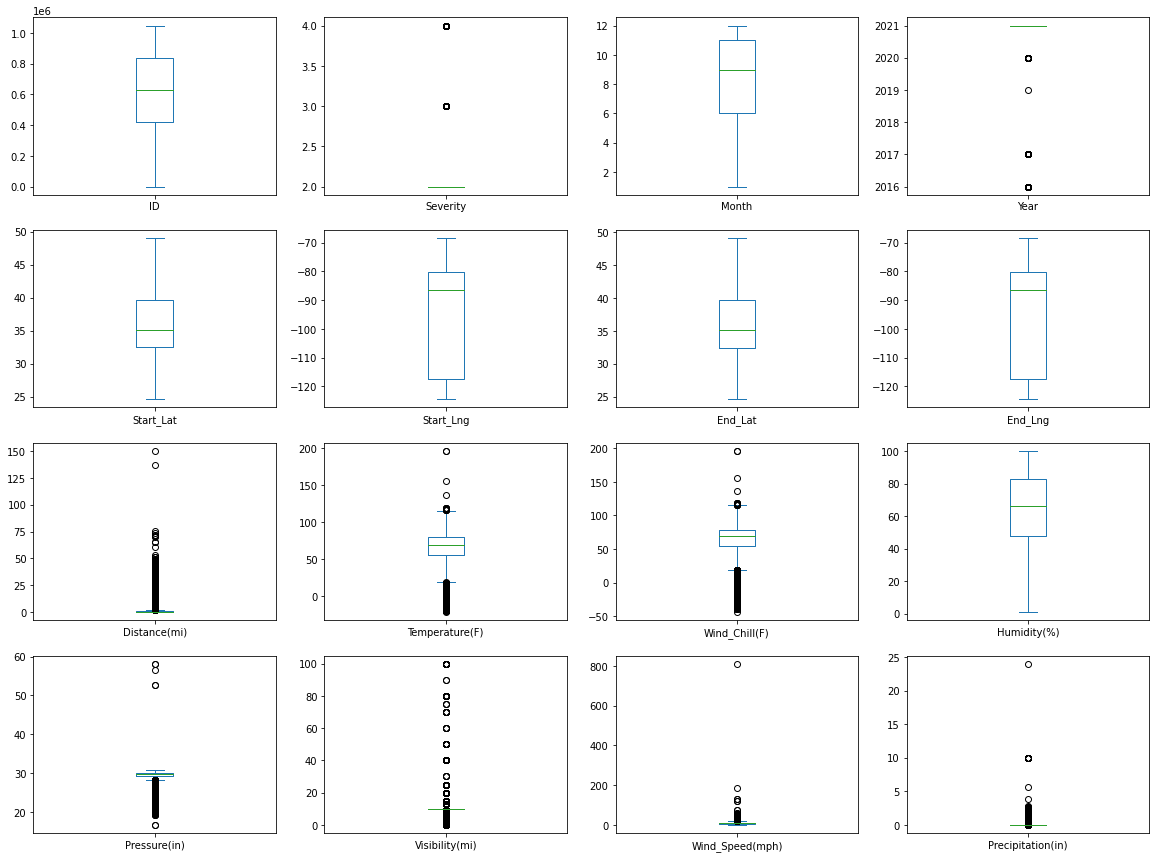

In [ ]:
# Detecting outliers in the columns using a box plot
from matplotlib import pyplot

pyplot.rcParams['figure.figsize']=(20,15)
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False)
pyplot.show()

There are some outliers that need to be removed

In [ ]:
# Create a list with the columns that contain outliers values
cols_with_outliers = ['Distance(mi)','Wind_Chill(F)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']

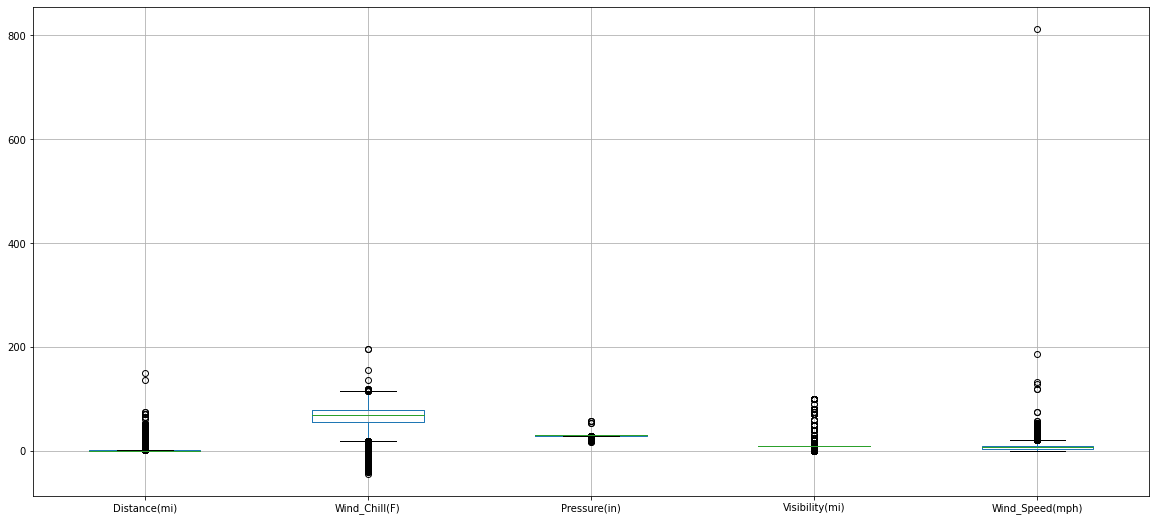

In [ ]:
# Plot the outliers' features
df[cols_with_outliers[:-1]].boxplot(figsize=(20,9));

In [ ]:
# Define a function called 'outliers' which return a list of index outliers
def outliers(df,ft):
  Q1 =df[ft].quantile(0.25)
  Q3 =df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [ ]:
# Create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['Distance(mi)','Wind_Chill(F)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']:
  index_list.extend(outliers(df, feature))

In [ ]:
# To see all the outlier rows
index_list

[0,
 13,
 23,
 30,
 42,
 43,
 49,
 61,
 63,
 122,
 138,
 144,
 145,
 146,
 151,
 159,
 191,
 195,
 198,
 224,
 252,
 437,
 438,
 439,
 491,
 494,
 587,
 614,
 631,
 2410,
 3091,
 3092,
 3481,
 3710,
 5403,
 5685,
 5823,
 6260,
 6614,
 7270,
 8697,
 9858,
 10504,
 10711,
 11617,
 11698,
 12138,
 12148,
 12365,
 12419,
 12443,
 12455,
 12566,
 12654,
 12664,
 12705,
 12914,
 12922,
 13467,
 13480,
 13536,
 13541,
 13566,
 13589,
 13628,
 13629,
 13662,
 13665,
 13690,
 13722,
 13723,
 14104,
 14265,
 14274,
 14331,
 14872,
 14882,
 15044,
 15102,
 15386,
 15397,
 15447,
 15581,
 15664,
 15679,
 15693,
 15703,
 15724,
 15741,
 15751,
 15816,
 15817,
 16125,
 16380,
 16398,
 16399,
 17041,
 17045,
 17181,
 17186,
 17187,
 17255,
 17792,
 17793,
 17794,
 18631,
 18892,
 19445,
 19446,
 19447,
 19458,
 19882,
 19888,
 19907,
 19909,
 19928,
 19938,
 19939,
 19940,
 19958,
 19959,
 19960,
 20143,
 20268,
 20306,
 20349,
 20361,
 20401,
 20437,
 20752,
 21324,
 24919,
 25434,
 25555,
 25637,
 

In [ ]:
# Define a function called 'remove' which returns a cleaned dataframe without outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
# Print the shape of the cleaned data
df_cleaned.shape

(516413, 44)

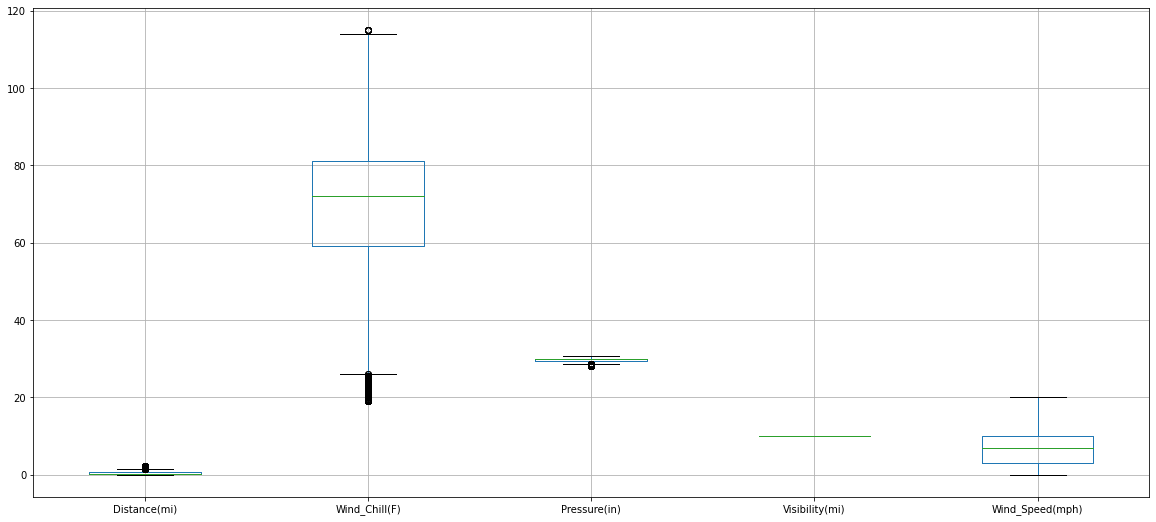

In [ ]:
# Re-plot the outliers' features to ensure they removed
df_cleaned[cols_with_outliers[:-1]].boxplot(figsize=(20,9));

In [ ]:
#df_cleaned.to_csv('Capstone_cleanedData.csv', index=False)

#### Dropping unneeded columns

In [ ]:
#Dropping unnessacary columns
column=["ID",'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', "City","County","Country","Timezone","Weather_Timestamp","Airport_Code"]
df_cleaned.drop(columns=column, inplace=True)

In [ ]:
print('Shape of dataset is ', df_cleaned.shape)

Shape of dataset is  (516413, 33)


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516413 entries, 455 to 1048574
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               516413 non-null  int64  
 1   Month                  516413 non-null  int64  
 2   Year                   516413 non-null  int64  
 3   Distance(mi)           516413 non-null  float64
 4   Street                 516413 non-null  object 
 5   Side                   516413 non-null  object 
 6   State                  516413 non-null  object 
 7   Temperature(F)         516413 non-null  float64
 8   Wind_Chill(F)          516413 non-null  float64
 9   Humidity(%)            516413 non-null  float64
 10  Pressure(in)           516413 non-null  float64
 11  Visibility(mi)         516413 non-null  float64
 12  Wind_Direction         516413 non-null  object 
 13  Wind_Speed(mph)        516413 non-null  float64
 14  Precipitation(in)      516413 non

### Feature Engineering - Scikit-Learn part

In [ ]:
# Verify the balance of our target column
df_cleaned['Severity'].value_counts()

2    506721
4      9363
3       329
Name: Severity, dtype: int64

There is an unbalanced situation. 

We will handle this in the pyspark part.

#### Label Encoding

In [ ]:
#Encoding our categorical columns
catList = df_cleaned.select_dtypes(include = ["object","bool"]).columns

In [ ]:
print (catList)

Index(['Street', 'Side', 'State', 'Wind_Direction', 'Weather_Condition',
       'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [ ]:
le = LabelEncoder()

for feat in catList:
    df_cleaned[feat] = le.fit_transform(df_cleaned[feat].astype(str))

print (df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516413 entries, 455 to 1048574
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               516413 non-null  int64  
 1   Month                  516413 non-null  int64  
 2   Year                   516413 non-null  int64  
 3   Distance(mi)           516413 non-null  float64
 4   Street                 516413 non-null  int64  
 5   Side                   516413 non-null  int64  
 6   State                  516413 non-null  int64  
 7   Temperature(F)         516413 non-null  float64
 8   Wind_Chill(F)          516413 non-null  float64
 9   Humidity(%)            516413 non-null  float64
 10  Pressure(in)           516413 non-null  float64
 11  Visibility(mi)         516413 non-null  float64
 12  Wind_Direction         516413 non-null  int64  
 13  Wind_Speed(mph)        516413 non-null  float64
 14  Precipitation(in)      516413 non

## Pyspark Section

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark
from pyspark.sql.functions import col, isnan, when, count, explode, array, lit
from pyspark.ml.feature import VectorAssembler, StringIndexer

### Connect to the Spark server

In [ ]:
spark = pyspark.sql.SparkSession.builder.getOrCreate()

In [ ]:
#Create PySpark DataFrame from Pandas
sparkDF=spark.createDataFrame(df_cleaned) 
sparkDF.printSchema()

root
 |-- Severity: long (nullable = true)
 |-- Month: long (nullable = true)
 |-- Year: long (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Street: long (nullable = true)
 |-- Side: long (nullable = true)
 |-- State: long (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- Visibility(mi): double (nullable = true)
 |-- Wind_Direction: long (nullable = true)
 |-- Wind_Speed(mph): double (nullable = true)
 |-- Precipitation(in): double (nullable = true)
 |-- Weather_Condition: long (nullable = true)
 |-- Amenity: long (nullable = true)
 |-- Bump: long (nullable = true)
 |-- Crossing: long (nullable = true)
 |-- Give_Way: long (nullable = true)
 |-- Junction: long (nullable = true)
 |-- No_Exit: long (nullable = true)
 |-- Railway: long (nullable = true)
 |-- Roundabout: long (nullable = true)
 |-- Station: long (nullable 

In [ ]:
sparkDF.show()

+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|Severity|Month|Year|Distance(mi)|Street|Side|State|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+------

### Data Preprocessing - Pyspark part

#### Descriptive Statistics

In [ ]:
sparkDF.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------------+-----------------+-------------------+--------------+-----------------+-----------------+-----------------+------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+------------+------------------+------------------+------------------+---------------------+
|summary|          Severity|             Month|              Year|      Distance(mi)|            Street|              Side|             State|    Temperature(F)|   Wind_Chill(F)|      Humidity(%)|       Pressure(in)|Visibility(mi)|   Wind_Direction|  Wind_Speed(mph)|Precipitation(in)| Weather_Condition|             Amenity|                Bump|          

#### Handling unbalanced target

In [ ]:
sparkDF.groupby('Severity').count().show()

+--------+------+
|Severity| count|
+--------+------+
|       3|   329|
|       2|506721|
|       4|  9363|
+--------+------+



Since we have three categories in the Severity column we will oversample the first category (which is 3) then we will report the same steps to oversample the second category (which is 4).

In [ ]:
#lets isolate all the data where the Severity are 2 and then the data where the Severity are 3.
severity2_df = sparkDF.filter(col("Severity") == 2)
severity3_df = sparkDF.filter(col("Severity") == 3)



#we will calculate the ratio to determine the difference between the number of each severity.
ratio = int(severity2_df.count()/severity3_df.count())
print("ratio: {}".format(ratio))

ratio: 1540


In [ ]:
#create a range on this ratio and store it in variable a
a = range(ratio)

#duplicate the minority rows
oversampled_df = severity3_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')

In [ ]:
#we can now see that the severity3_df has a new size which is quite similar to severity2_df
oversampled_df.count()

506660

In [ ]:
#combine both oversampled minority rows and previous majority rows using .unionAll()
combined_df = severity2_df.unionAll(oversampled_df)

In [ ]:
#lets isolate all the data where the Severity are 2 and then the data where the Severity are 4.
severity2_df = sparkDF.filter(col("Severity") == 2)
severity4_df = sparkDF.filter(col("Severity") == 4)


#we will calculate the ratio to determine the difference between the number of each severity.
ratio = int(severity2_df.count()/severity4_df.count())
print("ratio: {}".format(ratio))

ratio: 54


In [ ]:
#create a range on this ratio and store it in variable a
a = range(ratio)

#duplicate the minority rows
oversample_df = severity4_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')

In [ ]:
#we can now see that the severity4_df has a new size which is quite similar to severity2_df
oversample_df.count()

505602

In [ ]:
#combine both oversampled minority rows and previous majority rows using .unionAll()
combined_data = combined_df.unionAll(oversample_df)
combined_df.show()

+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|Severity|Month|Year|Distance(mi)|Street|Side|State|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+------

In [ ]:
combined_data.groupby('Severity').count().show()

+--------+------+
|Severity| count|
+--------+------+
|       2|506721|
|       3|506660|
|       4|505602|
+--------+------+



Since there are so many states it might become an issue for the machine-learning models to deal with. 

So we will keep the first 31 categories as they are, and for all the infrequent ones we will put them in one category called unknown.

In [ ]:
n = 32
   
# Take only top 31 most occuring values in each column
most_freq = combined_data.groupBy('State').count().orderBy('count', ascending=False).take(n - 1)
    
# Convert these top 31 most occuring values to pandas 
most_freq = spark.createDataFrame(most_freq).toPandas()
    
#convert the values column into list
most_freq = most_freq['State'].tolist()

# Within our main dataframe, we will only apply the states that we have extracted earlier and 
# Copy all of those rows when that state occurs and overwrite them into the state column, 
# Removing less occuring categories in the states column
combined_data = combined_data.withColumn('State', when(col('State').isin(most_freq), col('State')))

# Doing this will make all the other states as null

# To handle those nulls I can use .fillna and replace them with one single category called 'unknown'
final_df = combined_data.fillna('unknown', subset='State')

In [ ]:
final_df.show()

+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+-------+-------+----------+-------+----+---------------+--------------+------------+--------------+--------------+-----------------+---------------------+
|Severity|Month|Year|Distance(mi)|Street|Side|State|Temperature(F)|Wind_Chill(F)|Humidity(%)|Pressure(in)|Visibility(mi)|Wind_Direction|Wind_Speed(mph)|Precipitation(in)|Weather_Condition|Amenity|Bump|Crossing|Give_Way|Junction|No_Exit|Railway|Roundabout|Station|Stop|Traffic_Calming|Traffic_Signal|Turning_Loop|Sunrise_Sunset|Civil_Twilight|Nautical_Twilight|Astronomical_Twilight|
+--------+-----+----+------------+------+----+-----+--------------+-------------+-----------+------------+--------------+--------------+---------------+-----------------+-----------------+-------+----+--------+--------+--------+------

### Combining Feature Columns

In [ ]:
cols = final_df.columns #extract the column names from the dataframe
cols.remove('Severity') #remove severity -> we need this to be our label

#vector assembler will take all the columns and convert them into one column called features
assembler = VectorAssembler(inputCols=cols, outputCol='features', handleInvalid = "skip")

#the .transform will apply the changes here
final_df = assembler.transform(final_df)

In [ ]:
#we can now see that features column will appear within the dataframe
final_df

DataFrame[Severity: bigint, Month: bigint, Year: bigint, Distance(mi): double, Street: bigint, Side: bigint, State: bigint, Temperature(F): double, Wind_Chill(F): double, Humidity(%): double, Pressure(in): double, Visibility(mi): double, Wind_Direction: bigint, Wind_Speed(mph): double, Precipitation(in): double, Weather_Condition: bigint, Amenity: bigint, Bump: bigint, Crossing: bigint, Give_Way: bigint, Junction: bigint, No_Exit: bigint, Railway: bigint, Roundabout: bigint, Station: bigint, Stop: bigint, Traffic_Calming: bigint, Traffic_Signal: bigint, Turning_Loop: bigint, Sunrise_Sunset: bigint, Civil_Twilight: bigint, Nautical_Twilight: bigint, Astronomical_Twilight: bigint, features: vector]

### Split Data

In [ ]:
# We will now create a new dataframe only consisting of the features column and the label column 
df_data = final_df.select(col('features'), col('severity').alias('label'))

#simple data splitting
df_train, df_test = df_data.randomSplit([0.8, 0.2])

## Model Building

The data is now ready for some model building

In [ ]:
# Import some classifiers and multiclass evaluator
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#### 1st Classification Model 

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")
model_dt = dt.fit(df_train)

#### 2nd Classification Model  

In [ ]:
# Random Forest
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)
model_rf = rf.fit(df_train)

#### 3rd Classification Model

In [ ]:
# Logistic Regression
lr = LogisticRegression(maxIter=10, labelCol="label", featuresCol="features")
model_lr = lr.fit(df_train)

#### 4th Classification Model

In [ ]:
# Naïve Bayes
nb = NaiveBayes(labelCol="label", featuresCol="features", modelType='multinomial')
model_nb = nb.fit(df_train)

#### Models Predictions

In [ ]:
# Lets make the predictions here on the testing set using all the trained models
pred_dt = model_dt.transform(df_test)
pred_rf = model_rf.transform(df_test)
pred_lr = model_lr.transform(df_test)
pred_nb = model_nb.transform(df_test)

## Model Evaluation

### 1st Model  Evaluation

In [ ]:
from pyspark.ml.evaluation import *

dt_eval= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
dt_ACC  = dt_eval.evaluate(pred_dt, {dt_eval.metricName:"accuracy"})
print("Decision Tree Performance Measure")
print("Accuracy = %0.2f" % dt_ACC)

Decision Tree Performance Measure
Accuracy = 0.80


In [ ]:
#confusion matrix
cm_dt = pred_dt.crosstab("prediction", "label")
cm_dt = cm_dt.toPandas()
cm_dt.sort_values(by = ['prediction_label'])

,prediction_label,2,3,4
0,2.0,64504,0,19824
1,3.0,227,100360,2432
2,4.0,36294,0,77314


### 2nd Model  Evaluation

In [ ]:
from pyspark.ml.evaluation import *

rf_eval= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
rf_ACC  = rf_eval.evaluate(pred_rf, {rf_eval.metricName:"accuracy"})
print("Random Forest Performance Measure")
print("Accuracy = %0.2f" % rf_ACC)

Random Forest Performance Measure
Accuracy = 0.77


In [ ]:
#confusion matrix
cm_rf = pred_rf.crosstab("prediction", "label")
cm_rf = cm_rf.toPandas()
cm_rf.sort_values(by = ['prediction_label'])

,prediction_label,2,3,4
0,2.0,58905,927,22745
1,3.0,1181,99433,2633
2,4.0,40939,0,74192


### 3rd Model  Evaluation

In [ ]:
from pyspark.ml.evaluation import *

lr_eval= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
lr_ACC  = lr_eval.evaluate(pred_lr, {lr_eval.metricName:"accuracy"})
print("Logistic Regression Performance Measure")
print("Accuracy = %0.2f" % lr_ACC)

Logistic Regression Performance Measure
Accuracy = 0.75


In [ ]:
#confusion matrix
cm_lr = pred_lr.crosstab("prediction", "label")
cm_lr = cm_lr.toPandas()
cm_lr.sort_values(by = ['prediction_label'])

,prediction_label,2,3,4
0,2.0,65317,0,36479
1,3.0,234,100360,3135
2,4.0,35474,0,59956


### 4th Model  Evaluation

In [ ]:
from pyspark.ml.evaluation import *

nb_eval= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
nb_ACC  = nb_eval.evaluate(pred_nb, {nb_eval.metricName:"accuracy"})
print("Naïve Bayes Performance Measure")
print("Accuracy = %0.2f" % nb_ACC)

Naïve Bayes Performance Measure
Accuracy = 0.13


In [ ]:
#confusion matrix
cm_nb = pred_nb.crosstab("prediction", "label")
cm_nb = cm_nb.toPandas()
cm_nb.sort_values(by = ['prediction_label'])

,prediction_label,2,3,4
2,0.0,12292,3406,6923
1,1.0,49422,83100,45762
0,2.0,39311,13854,46885


## ML Evaluation as Dataframe

In [ ]:
# Accuracy Metric
evaluator_A = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# F1 Metric
evaluator_F = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

# Weighted Precision
evaluator_P = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")

# Weighted Recall
evaluator_R = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")

# Our models
models = [pred_dt, pred_rf, pred_lr, pred_nb]

# Empty lists that will store the scores for each metric for each model.
accuracy = []
F1 = []
precision = []
recall = []

# Simple loop to populate the empty lists with scores of models for each metric.
for model in models:
    accuracy.append(evaluator_A.evaluate(model))
    F1.append(evaluator_F.evaluate(model))
    precision.append(evaluator_P.evaluate(model))
    recall.append(evaluator_R.evaluate(model))

In [ ]:
# We will convert all lists created above into a dataframe for easy viewing.
df_eval = pd.DataFrame(list(zip(accuracy, F1, precision, recall)), 
                     columns = ['Accuracy', 'F1-Score', 'Weighted Precision', 'Weighted Recall'],
                     index = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Naïve Bayes'])

In [ ]:
df_eval

,Accuracy,F1-Score,Weighted Precision,Weighted Recall
Decision Tree,0.804698,0.802729,0.806786,0.804698
Random Forest,0.772640,0.769755,0.773808,0.772640
Logistic Regression,0.749723,0.747623,0.745891,0.749723
Naïve Bayes,0.130621,0.131254,0.131894,0.130621


## Model Selection 

#### Note: We will pick the best model and use grid search and cross-validation to get more detailed results.

Based on our overall results, the decision tree was selected as our best model and will be optemized using grid search and cross-validation.

## Model Optimization - Hyperparameter Tuning 

In [ ]:
# Decision Tree - with the best params -> max depth = 19
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=19)
model_dt = dt.fit(df_train)

In [ ]:
pre_dt = model_dt.transform(df_test)

In [ ]:
from pyspark.ml.evaluation import *

dt_eval= MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="label")
dt_ACC  = dt_eval.evaluate(pre_dt, {dt_eval.metricName:"accuracy"})
print("Decision Tree Performance Measure")
print("Accuracy = %0.2f" % dt_ACC)

Decision Tree Performance Measure
Accuracy = 0.94


In [ ]:
#confusion matrix
cm_dt = pred_dt.crosstab("prediction", "label")
cm_dt = cm_dt.toPandas()
cm_dt.sort_values(by = ['prediction_label'])

,prediction_label,2,3,4
0,2.0,64504,0,19824
1,3.0,227,100360,2432
2,4.0,36294,0,77314


We can see that the percentage increased. There is a significant improvement.